In [1]:
# Imports for data manipulation & visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Imports for data
file = '/Users/Lisa/_MLB_Prediction_capstone/cleaned_batting_df.csv'
file2 = '/Users/Lisa/_MLB_Prediction_capstone/cleaned_piching_df.csv'
file3 = '/Users/Lisa/_MLB_Prediction_capstone/complete_game_df.csv'
file4 = '/Users/Lisa/_MLB_Prediction_capstone/team_stats.csv'
batting_df = pd.read_csv(file, low_memory=False)
pitching_df = pd.read_csv(file2, low_memory=False, dtype={'teamAbbrev':str, 'playerName':str})
game_df = pd.read_csv(file3, low_memory=False)
team_df = pd.read_csv(file4, low_memory=False)
batting_df.drop('Unnamed: 0', axis=1, inplace=True)
pitching_df.drop('Unnamed: 0', axis=1, inplace=True)
game_df.drop('Unnamed: 0', axis=1, inplace=True)
team_df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
# Change the teamAbbrev column to a string since its an object
pitching_df.teamAbbrev = pitching_df.teamAbbrev.astype("string")

In [4]:
# Save the ne string column
names = pitching_df['teamAbbrev']

# Drop teamAbbrev so I can force the rest of the values to floats
pitching_df.drop('teamAbbrev', axis=1, inplace=True)
pitching_df = pitching_df.apply(pd.to_numeric, errors='coerce')

# Add the names column back to the rest of the float data
pitching_df['teamAbbrev'] = names

# select the years after 2009 for pitching stats
pitching_df = pitching_df[pitching_df['year'] > 2009]

In [5]:
# Create yearly team pitching stats for plotting
team_whip_mean = pitching_df.groupby(["year", "teamAbbrev"])['whip'].mean()
team_era_mean = pitching_df.groupby(["year", "teamAbbrev"])['era'].mean()
team_strikeoutsPer9_avg = pitching_df.groupby(["year", "teamAbbrev"])['strikeoutsPer9'].mean()
team_runsScoredPer9_avg = pitching_df.groupby(["year", "teamAbbrev"])['runsScoredPer9'].mean()

In [6]:
# Washington has name discrempencies - making changes here...
team_df.replace(to_replace='WSH', value='WAS', inplace=True)

In [7]:
# Get the teams total wins for each season
x = game_df[game_df['Home_team_won?']==False].groupby(['current_year','VisitingTeam']).count()
w = game_df[game_df['Home_team_won?']==True].groupby(['current_year','HomeTeam']).count()

# Get total wins by adding the two columns together and put it to frame
wins = x['Home_team_won?'] + w['Home_team_won?']
wins = wins.to_frame()

# Now Merging wins to team_df so each team will have the wins for the seaon
team_df = team_df.merge(wins, how='left', left_on=['year', 'teamAbbrev'], right_on=['current_year', 'VisitingTeam'])

# creating a new dataframe that has the 2010 - 2019 seasons
use_this = team_df[team_df['year'] > 2009]

In [8]:
use_this

,year,teamAbbrev,hits,team_BA,totalBases,total_bases_avg,leftOnBase,LOB_avg,runs,runs_avg,strikeOuts,atBats,K_avg,baseOnBalls,BB_avg,rbi,RBI_avg,Home_team_won?
30,2010,ARI,1330,0.219,2210,0.364,2319,0.382,684,0.113,1508,5396,0.279,560,0.092,667,0.110,65.0
31,2010,ATL,1558,0.227,2492,0.363,2701,0.393,832,0.121,1299,6040,0.215,666,0.097,801,0.117,91.0
32,2010,BAL,1353,0.234,2032,0.352,2213,0.383,584,0.101,1040,5242,0.198,414,0.072,550,0.095,66.0
33,2010,BOS,1599,0.236,2680,0.395,2565,0.378,870,0.128,1217,6023,0.202,630,0.093,805,0.119,89.0
34,2010,CHC,1208,0.229,1925,0.365,2001,0.379,585,0.111,1078,4718,0.228,421,0.080,585,0.111,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2019,STL,1325,0.217,2243,0.367,2248,0.368,759,0.124,1406,5393,0.261,555,0.091,707,0.116,91.0
326,2019,TB,1551,0.227,2625,0.384,2580,0.377,834,0.122,1587,6103,0.260,601,0.088,788,0.115,96.0
327,2019,TEX,1298,0.223,2260,0.387,2107,0.361,765,0.131,1492,5216,0.286,494,0.085,714,0.122,78.0
328,2019,TOR,1116,0.207,2049,0.379,1964,0.364,643,0.119,1381,4846,0.285,475,0.088,622,0.115,67.0


Text(0, 0.5, 'Team Wins')

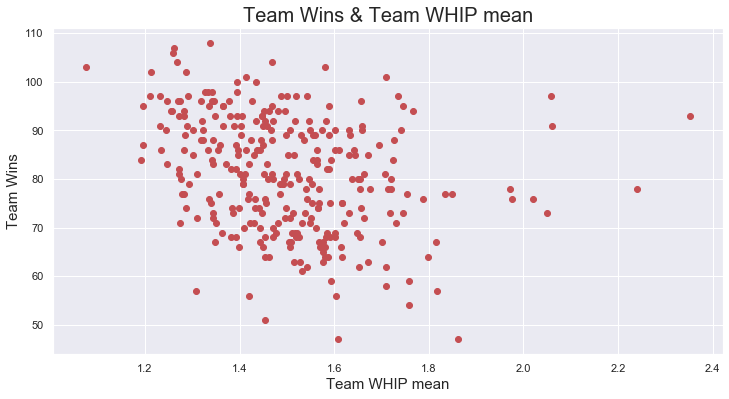

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(team_whip_mean, use_this['Home_team_won?'], c="r")
ax.set_title("Team Wins & Team WHIP mean", fontsize=20)
ax.set_xlabel("Team WHIP mean", fontsize=15)
ax.set_ylabel("Team Wins", fontsize=15)
#fig.savefig("wins_vs_WHIP.png", bbox_inches='tight', dpi=600)

Text(0, 0.5, 'Team Wins')

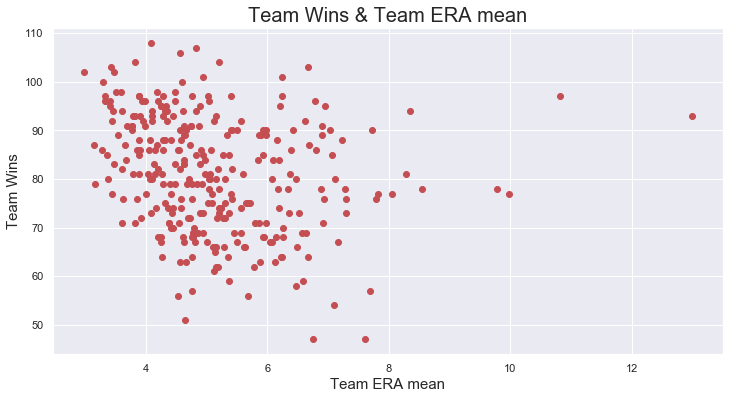

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(team_era_mean, use_this['Home_team_won?'], c="r")
ax.set_title("Team Wins & Team ERA mean", fontsize=20)
ax.set_xlabel("Team ERA mean", fontsize=15)
ax.set_ylabel("Team Wins", fontsize=15)
#fig.savefig("wins_vs_ERA.png", bbox_inches='tight', dpi=600)

Text(0, 0.5, 'Team Wins')

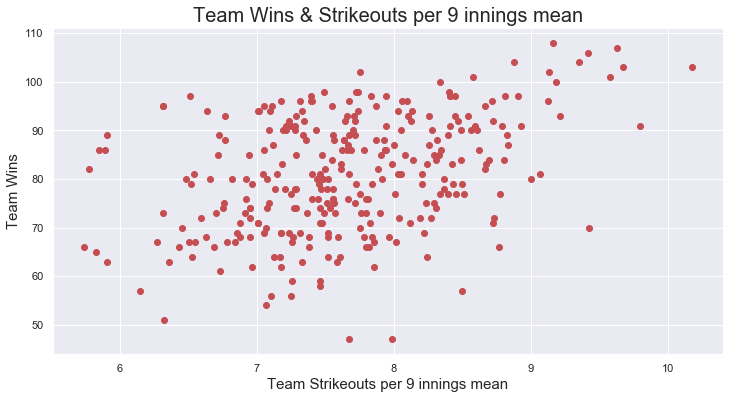

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(team_strikeoutsPer9_avg, use_this['Home_team_won?'], c="r")
ax.set_title("Team Wins & Strikeouts per 9 innings mean", fontsize=20)
ax.set_xlabel("Team Strikeouts per 9 innings mean", fontsize=15)
ax.set_ylabel("Team Wins", fontsize=15)
#fig.savefig("wins_vs_K9.png", bbox_inches='tight', dpi=600)

Text(0, 0.5, 'Team Wins')

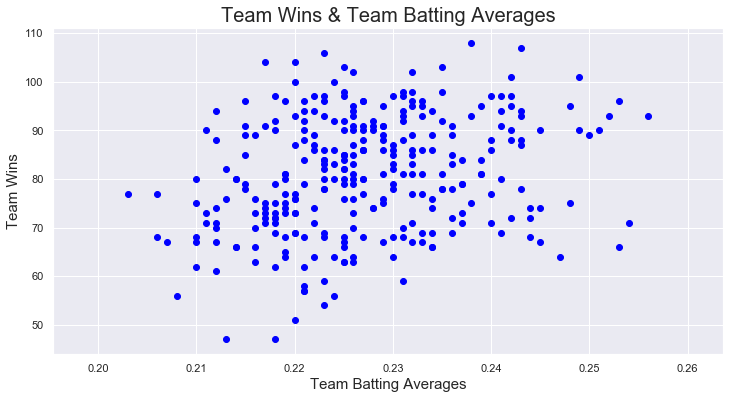

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(use_this.team_BA, use_this['Home_team_won?'], c="blue")
ax.set_title("Team Wins & Team Batting Averages", fontsize=20)
ax.set_xlabel("Team Batting Averages", fontsize=15)
ax.set_ylabel("Team Wins", fontsize=15)
#fig.savefig("wins_vs_BA.png", bbox_inches='tight', dpi=600)

Text(0, 0.5, 'Team Wins')

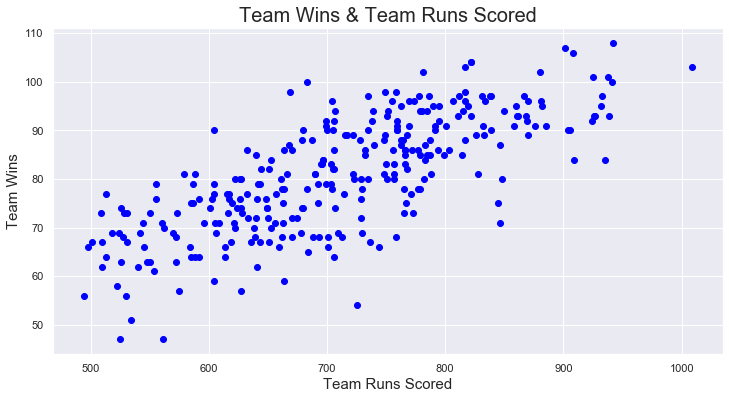

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(use_this.runs, use_this['Home_team_won?'], c="blue")
ax.set_title("Team Wins & Team Runs Scored", fontsize=20)
ax.set_xlabel("Team Runs Scored", fontsize=15)
ax.set_ylabel("Team Wins", fontsize=15)
#fig.savefig("wins_vs_runs_scored.png", bbox_inches='tight', dpi=600)

Text(0, 0.5, 'Team Wins')

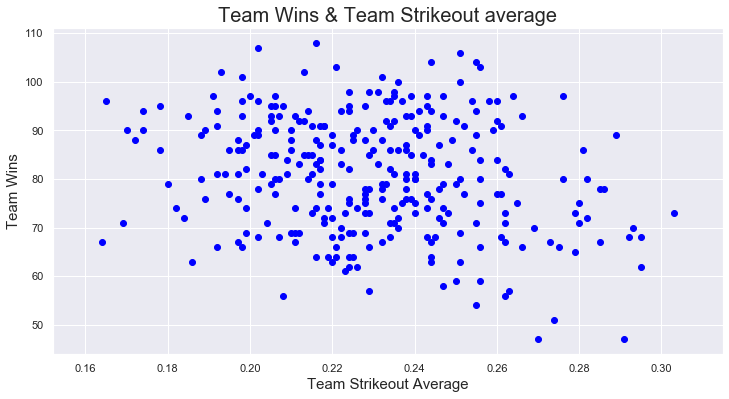

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(use_this.K_avg, use_this['Home_team_won?'], c="blue")
ax.set_title("Team Wins & Team Strikeout average", fontsize=20)
ax.set_xlabel("Team Strikeout Average", fontsize=15)
ax.set_ylabel("Team Wins", fontsize=15)
#fig.savefig("wins_vs_K_avg.png", bbox_inches='tight', dpi=600)